In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset=pd.read_csv("spam_data.csv",encoding='latin1' )
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
dataset=dataset.dropna(axis=1)

In [4]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
print('MEssages',dataset["message"][0])

MEssages Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [6]:
dataset.columns

Index(['label', 'message'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10184\1592786557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label']=dataset['label'].map({'ham':0,'spam':1})


In [10]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

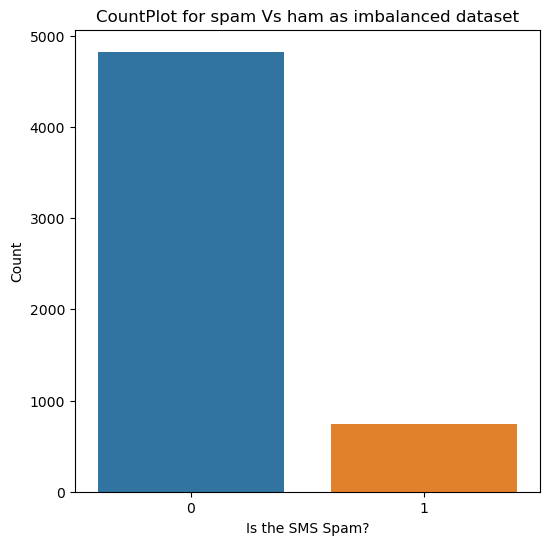

In [12]:
#CountPlot for spam and ham sms imbalanced dataset
plt.figure(figsize=(6,6))
g=sns.countplot(x='label',data=dataset)
p=plt.title("CountPlot for spam Vs ham as imbalanced dataset")
p=plt.xlabel("Is the SMS Spam?")
p=plt.ylabel("Count")
plt.show()

In [13]:
#Handling imbalanced dataset using oversampling
only_spam=dataset[dataset['label']==1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print("No. of Spam SMS:",len(only_spam))
print("No. of Non-Spam SMS:",len(dataset)-len(only_spam))

No. of Spam SMS: 747
No. of Non-Spam SMS: 4825


In [15]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [16]:
count

6

In [17]:
dataset.shape,only_spam.shape

((5572, 2), (747, 2))

In [18]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset.shape

(9307, 2)

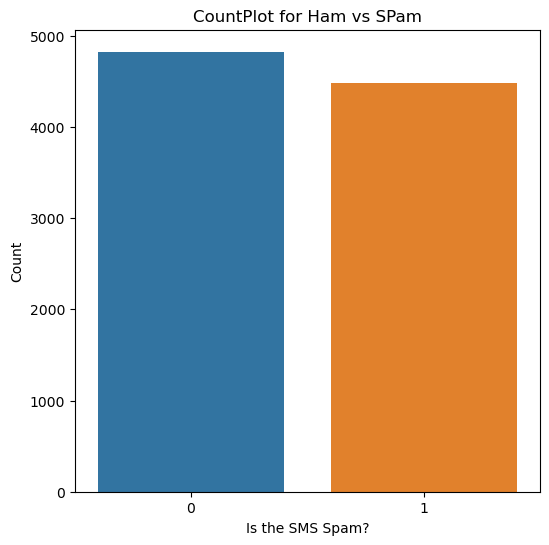

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='label',data=dataset)
plt.title("CountPlot for Ham vs SPam")
plt.xlabel("Is the SMS Spam?")
plt.ylabel("Count")
plt.show()

In [20]:
#Creating new feature word_count
dataset['word_count']=dataset['message'].apply(lambda x:len(x.split()))

In [21]:
dataset['word_count']

0       20
1        6
2       28
3       11
4       13
        ..
5537    16
5540    33
5547    28
5566    28
5567    30
Name: word_count, Length: 9307, dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


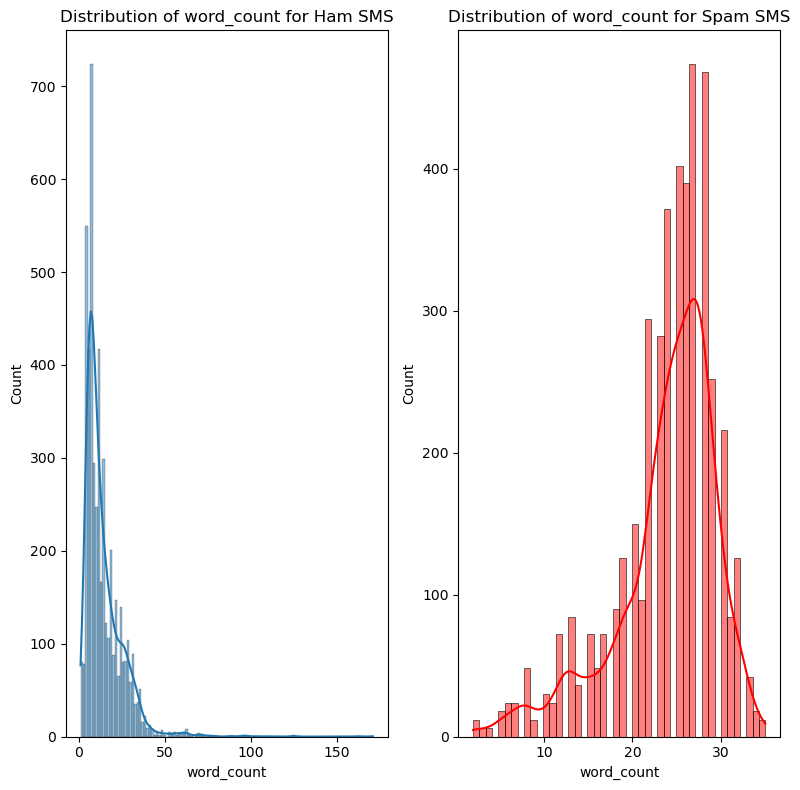

In [22]:
plt.figure(figsize=(8,8))

#(1,1)
plt.subplot(1,2,1)
sns.histplot(dataset[dataset["label"]==0].word_count,kde=True)
plt.title("Distribution of word_count for Ham SMS")

#(2,2)
plt.subplot(1,2,2)
sns.histplot(dataset[dataset['label']==1].word_count,color='red',kde=True)

plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [23]:
#Creating new features for containing currecny syntax 
def currency(data):
    currency_symbols= ['$', '€', '£', '¥', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [24]:
dataset['contains_currency_symbol']=dataset['message'].apply(currency)

In [25]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


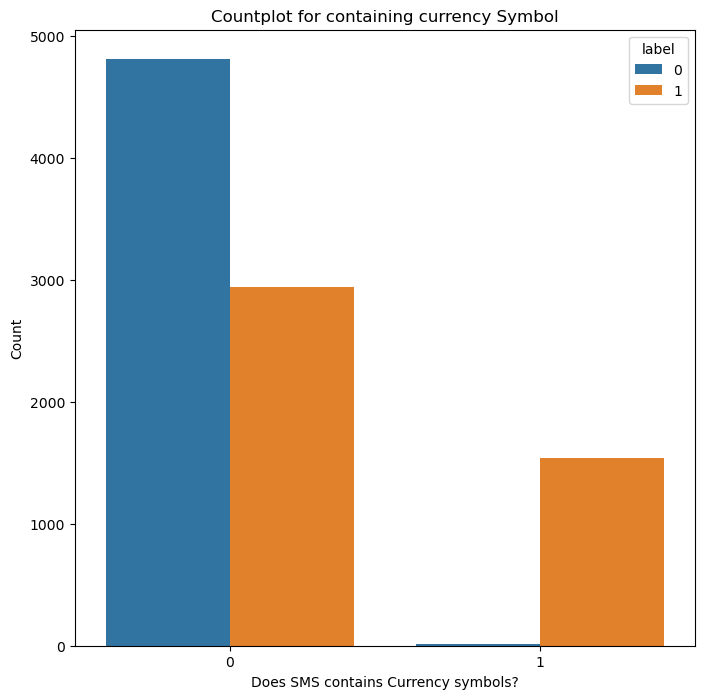

In [26]:
#countplot for contains_currecny_symbols
plt.figure(figsize=(8,8))
sns.countplot(x='contains_currency_symbol',data=dataset,hue='label')
plt.title("Countplot for containing currency Symbol")
plt.xlabel("Does SMS contains Currency symbols?")
plt.ylabel("Count")
plt.show()

In [27]:
#Creating new features of containing numbers 
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [28]:
dataset['contains_number']=dataset['message'].apply(number)

In [29]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


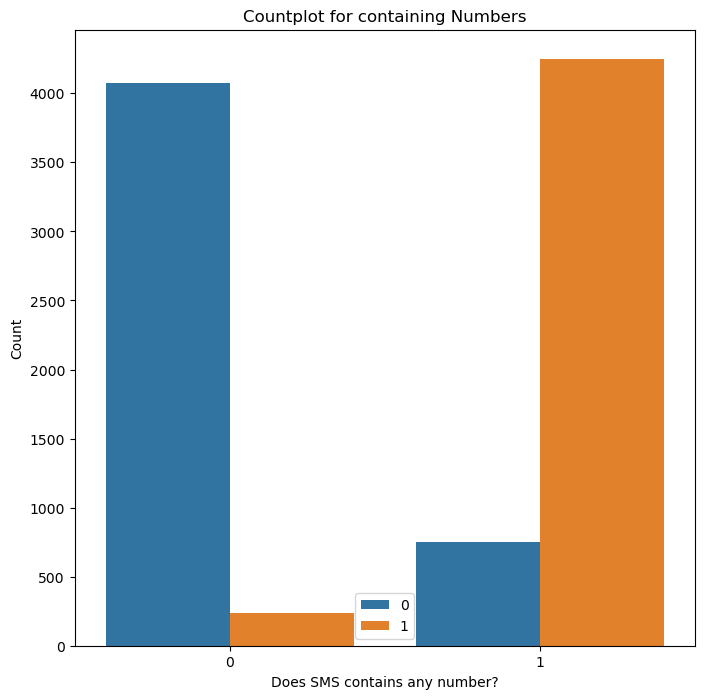

In [30]:
#Countplot for containing numbers
plt.figure(figsize=(8,8))
sns.countplot(x='contains_number',data=dataset,hue='label')
plt.title("Countplot for containing Numbers")
plt.xlabel("Does SMS contains any number?")
plt.ylabel("Count")
plt.legend()

In [31]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
corpus=[]
wnl=WordNetLemmatizer()

for sms in dataset['message']:
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms) #filtering of special characters and numbers
    message=message.lower()
    words=message.split() # tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lem_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lem_words)
    
    corpus.append(message)

In [33]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [34]:
#Creating the bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [35]:
X=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [36]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.332568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model_1=MultinomialNB()
cv=cross_val_score(model_1,X,y,scoring='f1',cv=10)
print(cv.mean())
print(cv.std())

0.9437416617211664
0.004078956477940389


In [40]:
model_1.fit(X_train,y_train)
y_preds_1=model_1.predict(X_test)

In [41]:
print(classification_report(y_test,y_preds_1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       946
           1       0.94      0.94      0.94       916

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [42]:
confu_1=confusion_matrix(y_test,y_preds_1)
confu_1

array([[888,  58],
       [ 56, 860]], dtype=int64)

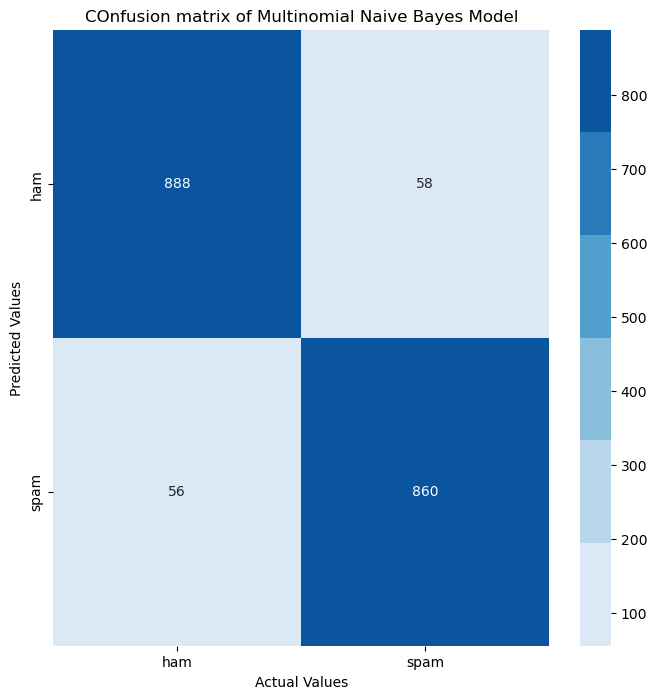

In [43]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
color_palete=sns.color_palette("Blues")
sns.heatmap(data=confu_1,
            xticklabels=axis_labels,
            yticklabels=axis_labels,
            cmap=color_palete,
           annot=True,
           fmt='d')
plt.title("COnfusion matrix of Multinomial Naive Bayes Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [44]:
from sklearn.svm  import SVC

model_2=SVC(random_state=1)
model_2.fit(X_train,y_train)
y_preds_2=model_2.predict(X_test)
print(classification_report(y_test,y_preds_2))
confu_2=confusion_matrix(y_test,y_preds_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       1.00      1.00      1.00       916

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



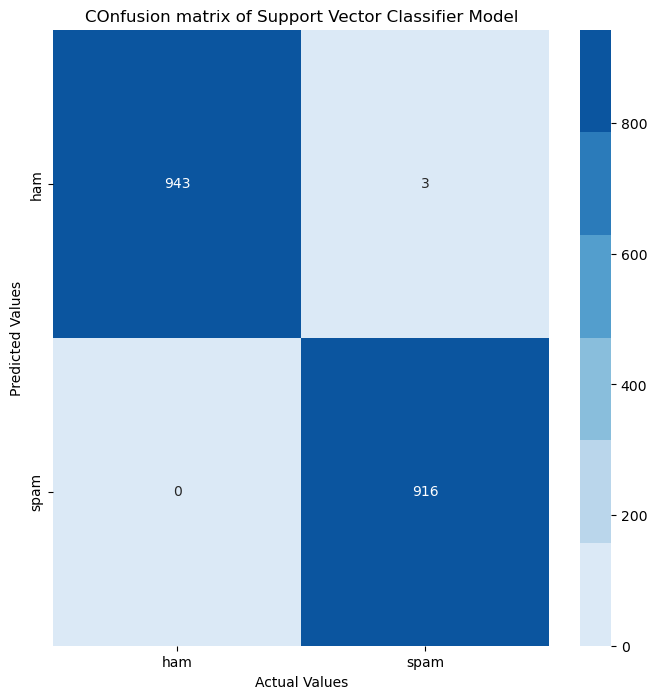

In [45]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
color_palete=sns.color_palette("Blues")
sns.heatmap(data=confu_2,
            xticklabels=axis_labels,
            yticklabels=axis_labels,
            cmap=color_palete,
           annot=True,
           fmt='d')
plt.title("COnfusion matrix of Support Vector Classifier Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [53]:

def predict_spam(sms):
    for sms in dataset['message']:
        message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms) #filtering of special characters and numbers
        message=message.lower()
        words=message.split() # tokenizer
        filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
        lem_words=[wnl.lemmatize(word) for word in filtered_words]
        message=' '.join(lem_words)
        tfidf.fit(X_train)
        temp=tfidf.transform([message]).toarray()
        return model_2.predict(temp)

In [58]:
#Prediction:1 lottery text message
sample_message="Pls tell your debit card number and cvv with its pin"

if predict_spam(sample_message):
    print("This is a Spam Message")
else:
    print("This is a Non_spam Message")

This is a Non_spam Message


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
